<a href="https://colab.research.google.com/github/hjfuentes/Laboratorio-Datos-Sociales/blob/main/Sesion04/distance_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.6 MB/s eta 0:00:00


In [ ]:
from dcor import distance_correlation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Datos
X = np.array([1, 2, 3, 4, 5])
Y = np.array([60, 75, 90, 75, 60])

Sea el conjunto de datos definido por los vectores:

$$
X = [1,\, 2,\, 3,\, 4,\, 5]
$$

$$
Y = [60,\, 75,\, 90,\, 75,\, 60]
$$


In [ ]:
from scipy.stats import pearsonr

pearson, _ = pearsonr(X, Y)
print(f"Coeficiente de Pearson: {pearson:.3f}")

Coeficiente de Pearson: 0.000


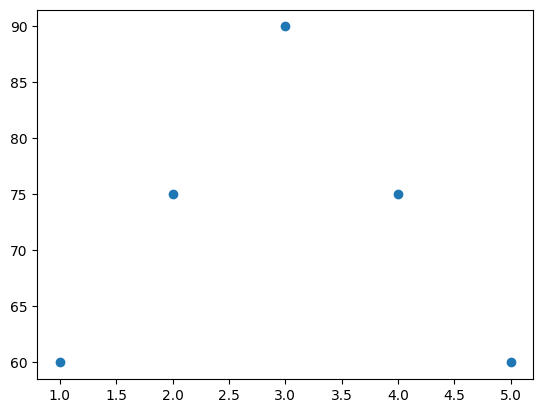

In [ ]:
plt.scatter(X,Y)

In [ ]:
# Calcular matrices de distancias
DX = np.abs(X[:, None] - X[None, :])
DY = np.abs(Y[:, None] - Y[None, :])

Para cada par de observaciones, calculo la distancia absoluta entre los valores de $ X $ y $ Y $:

$$
D_X(i,j) = |X_i - X_j|
$$
$$
D_Y(i,j) = |Y_i - Y_j|
$$

De esta forma obtengo las matrices de distancias $ D_X $ y $ D_Y $ que representan todas las diferencias absolutas entre los elementos de cada variable.

In [ ]:
DX

array([[0, 1, 2, 3, 4],
       [1, 0, 1, 2, 3],
       [2, 1, 0, 1, 2],
       [3, 2, 1, 0, 1],
       [4, 3, 2, 1, 0]])

In [ ]:
DY

array([[ 0, 15, 30, 15,  0],
       [15,  0, 15,  0, 15],
       [30, 15,  0, 15, 30],
       [15,  0, 15,  0, 15],
       [ 0, 15, 30, 15,  0]])

In [ ]:
# Centrar las matrices (restar medias de filas y columnas)
DX_mean_row = DX.mean(axis=1, keepdims=True)
DX_mean_col = DX.mean(axis=0, keepdims=True)
DX_mean_total = DX.mean()
A = DX - DX_mean_row - DX_mean_col + DX_mean_total

In [ ]:
A

array([[-2.40000000e+00, -8.00000000e-01,  4.00000000e-01,
         1.20000000e+00,  1.60000000e+00],
       [-8.00000000e-01, -1.20000000e+00,  2.22044605e-16,
         8.00000000e-01,  1.20000000e+00],
       [ 4.00000000e-01,  2.22044605e-16, -8.00000000e-01,
         2.22044605e-16,  4.00000000e-01],
       [ 1.20000000e+00,  8.00000000e-01,  2.22044605e-16,
        -1.20000000e+00, -8.00000000e-01],
       [ 1.60000000e+00,  1.20000000e+00,  4.00000000e-01,
        -8.00000000e-01, -2.40000000e+00]])

A continuación, centro la matriz de distancias $ D_X $ restando las medias de filas y columnas, y sumando la media total.  
El resultado se denomina **matriz de distancias centrada** $ A $:

$$
A_{ij} = D_X(i,j) - \bar{D}_{X,i\cdot} - \bar{D}_{X,\cdot j} + \bar{D}_{X,\cdot\cdot}
$$

donde:
- $\bar{D}_{X,i\cdot}$ es la media de la fila $i$,
- $\bar{D}_{X,\cdot j}$ es la media de la columna $j$,
- $\bar{D}_{X,\cdot\cdot}$ es la media total de la matriz $D_X$.

In [ ]:
DY_mean_row = DY.mean(axis=1, keepdims=True)
DY_mean_col = DY.mean(axis=0, keepdims=True)
DY_mean_total = DY.mean()
B = DY - DY_mean_row - DY_mean_col + DY_mean_total

De forma análoga, centro la matriz de distancias $ D_Y $ para obtener la matriz $ B $:

$$
B_{ij} = D_Y(i,j) - \bar{D}_{Y,i\cdot} - \bar{D}_{Y,\cdot j} + \bar{D}_{Y,\cdot\cdot}
$$

donde:
- $\bar{D}_{Y,i\cdot}$ es la media de la fila $i$,
- $\bar{D}_{Y,\cdot j}$ es la media de la columna $j$,
- $\bar{D}_{Y,\cdot\cdot}$ es la media total de la matriz $D_Y$.

In [ ]:
# Calcular distancia-covarianza y varianzas
dcov_xy = np.sqrt((A * B).mean())
dcov_xx = np.sqrt((A * A).mean())
dcov_yy = np.sqrt((B * B).mean())

A continuación, calculo la **distancia-covarianza** entre $ X $ y $ Y $, así como las **distancias-varianza** de cada variable:

$$
\text{dCov}(X,Y) = \sqrt{\frac{1}{n^2} \sum_{i,j} A_{ij} B_{ij}}
$$

$$
\text{dVar}(X) = \sqrt{\frac{1}{n^2} \sum_{i,j} A_{ij}^2}
$$

$$
\text{dVar}(Y) = \sqrt{\frac{1}{n^2} \sum_{i,j} B_{ij}^2}
$$

Estas medidas permiten capturar la dependencia entre variables incluso si la relación no es lineal.


In [ ]:
# Calcular coeficiente de correlación de distancia
dcor = dcov_xy / np.sqrt(dcov_xx * dcov_yy)
print(f"Coeficiente de correlación de distancia: {dcor:.3f}")

Coeficiente de correlación de distancia: 0.530


Finalmente, calculo el **coeficiente de correlación de distancia** ($dCor$) normalizando la distancia-covarianza por las distancias-varianza de cada variable:

$$
dCor(X,Y) = \frac{\text{dCov}(X,Y)}{\sqrt{\text{dVar}(X) \cdot \text{dVar}(Y)}}
$$

Este valor toma valores entre 0 y 1, donde 0 indica independencia total y 1 indica dependencia perfecta (lineal o no lineal).

In [ ]:
# Calcular la correlación de distancia
dcor = distance_correlation(X, Y)

print(f"Coeficiente de correlación de distancia: {dcor:.3f}")

Coeficiente de correlación de distancia: 0.530


/usr/local/lib/python3.12/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
